<a href="https://colab.research.google.com/github/rubensgamaliel/CognitiveClass/blob/main/DatViz/Data_vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a dot using the scripting layer of matplotlib

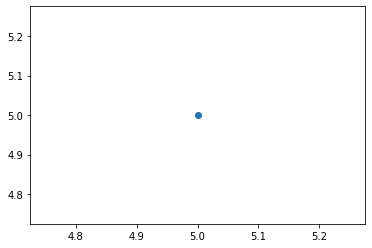

In [1]:
import matplotlib.pyplot as plt
plt.plot(5,5,'o')
plt.show()

The Dataset: Immigration Data to Canada

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/Data science/dataframes/UN_MigFlow_All_CountryFiles/Canada.xlsx',sheet_name="Canada by Citizenship",skiprows=20,skipfooter=2)

In [5]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Processing the dataframe

In [6]:
#renaming the columns
df=df.rename(columns={"OdName": "Country", "AreaName": "Continent", "RegName": "Region"})
#setting the country as index
df=df.set_index('Country')
#dropping the columns we will not use
df=df.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"])
# Calc total and append to the last column
df['Total'] = df.iloc[:, 3:].sum(axis=1)
# Convert all column name to string so that there will be no index error later on
df.columns = df.columns.astype(str)
# Print first five lines
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


Creating the years

In [7]:
years=list(map(str,range(1980,2014)))

Text(0.5, 0, 'Years')

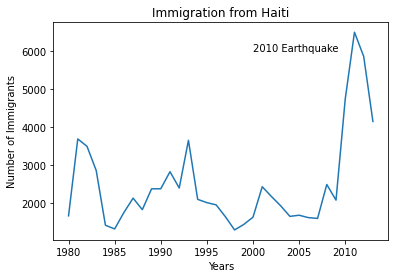

In [8]:
df.loc['Haiti',years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.text(20, 6000, '2010 Earthquake') # see note below
plt.xlabel('Years')

In [12]:
df.sort_values('Total', inplace=True,ascending=False)

In [22]:
df5=df.head(5)
df5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [23]:
df5=df5.transpose().iloc[3:-1]

Area plot

Text(0.5, 0, 'Years')

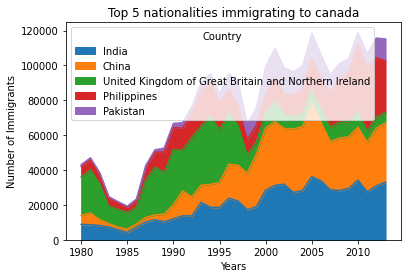

In [27]:
df5.plot(kind='area')
plt.title('Top 5 nationalities immigrating to canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'number of immigrants')

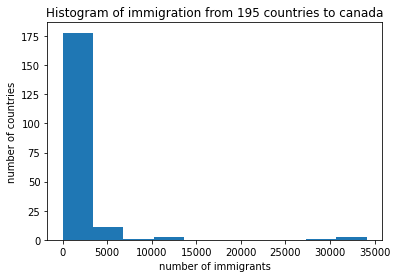

In [28]:
df['2013'].plot(kind='hist')
plt.title("Histogram of immigration from 195 countries to canada")
plt.ylabel('number of countries')
plt.xlabel('number of immigrants')

In [29]:
import numpy as np

Text(0.5, 0, 'number of immigrants')

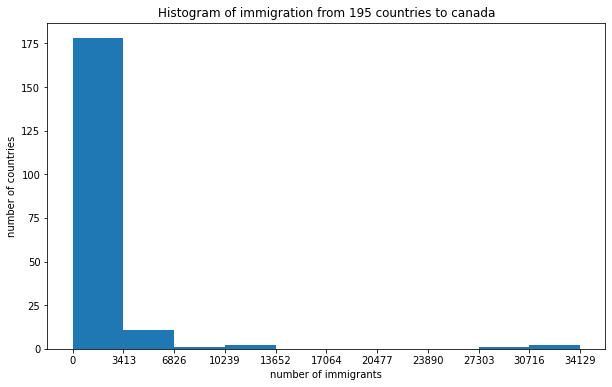

In [33]:
count,bin_edges=np.histogram(df['2013'])
df['2013'].plot(kind='hist',xticks=bin_edges,figsize=(10,6))
plt.title("Histogram of immigration from 195 countries to canada")
plt.ylabel('number of countries')
plt.xlabel('number of immigrants')


In [34]:
count

array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2])